<a href="https://colab.research.google.com/github/AB69D/ML-Colabratory/blob/main/paper_apple_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc


In [3]:
img_height, img_width = 128,128
batch_size = 32

In [4]:
train_dir = "/content/drive/MyDrive/appledataset/apple_disease_classification/apple_disease_classification/Train"
val_dir = "/content/drive/MyDrive/appledataset/apple_disease_classification/apple_disease_classification/Test"

ROW CNN




Base Model


In [5]:
# creating a validaion data loader you can add autotuner
val_ds = keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# creating a train data loader you can add autotuner
train_ds = keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 378 files belonging to 4 classes.
Found 1599 files belonging to 4 classes.


In [6]:
model1 = keras.Sequential([
    keras.layers.Conv2D(filters= 10,kernel_size=3,
                        input_shape=(128, 128, 3),
                        activation='relu'),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),

    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation='relu'),
    keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    keras.layers.Flatten(), # flatten the layer to convert it into a dense metricx
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(4,activation=keras.activations.softmax) # Dense layer of 4 since we have 4 classes, due to multi class we are using the softmax activation
])

In [8]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='apple_model',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [9]:
model1.compile(loss=keras.losses.sparse_categorical_crossentropy,
               optimizer=keras.optimizers.Adam(),
               metrics=['accuracy'])
his = model1.fit(train_ds,epochs=30,validation_data = val_ds,callbacks=[early_stop,model_checkpoint_callback])

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 35.8119 - accuracy: 0.3665 

50/50 [==============================] - 523s 9s/step - loss: 35.8119 - accuracy: 0.3665 - val_loss: 1.0922 - val_accuracy: 0.5503
Epoch 2/30
48/50 [===========================>..] - ETA: 0s - loss: 0.8866 - accuracy: 0.6582

50/50 [==============================] - 8s 143ms/step - loss: 0.8805 - accuracy: 0.6623 - val_loss: 0.6198 - val_accuracy: 0.7910
Epoch 3/30
48/50 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.8092

50/50 [==============================] - 10s 176ms/step - loss: 0.5283 - accuracy: 0.8105 - val_loss: 0.5144 - val_accuracy: 0.7937
Epoch 4/30
48/50 [===========================>..] - ETA: 0s - loss: 0.3446 - accuracy: 0.8874

50/50 [==============================] - 10s 180ms/step - loss: 0.3408 - accuracy: 0.8874 - val_loss: 0.2367 - val_accuracy: 0.9392
Epoch 5/30
48/50 [===========================>..] - ETA: 0s - loss: 0.1916 - accuracy: 0.9460

50/50 [==============================] - 8s 144ms/step - loss: 0.1908 - accuracy: 0.9468 - val_loss: 0.2030 - val_accuracy: 0.9524
Epoch 6/30
48/50 [===========================>..] - ETA: 0s - loss: 0.1151 - accuracy: 0.9772

50/50 [==============================] - 10s 165ms/step - loss: 0.1155 - accuracy: 0.9756 - val_loss: 0.1518 - val_accuracy: 0.9709
Epoch 7/30
50/50 [==============================] - 8s 152ms/step - loss: 0.0760 - accuracy: 0.9844 - val_loss: 0.2132 - val_accuracy: 0.9630
Epoch 8/30
50/50 [==============================] - 7s 123ms/step - loss: 0.0457 - accuracy: 0.9950 - val_loss: 0.2201 - val_accuracy: 0.9603
Epoch 9/30
50/50 [==============================] - 9s 158ms/step - loss: 0.0254 - accuracy: 0.9981 - val_loss: 0.2059 - val_accuracy: 0.9603
Epoch 10/30
50/50 [==============================] - 8s 153ms/step - loss: 0.0175 - accuracy: 0.9987 - val_loss: 0.2025 - val_accuracy: 0.9683
Epoch 11/30
50/50 [==============================] - 7s 125ms/step - loss: 0.0174 - accuracy: 0.9987 - val_loss: 0.1786 - val_accuracy: 0.9709
Epoch 12/30
50/50 [==============================] - 9s 154ms/step - loss: 0.0184 - accuracy: 0.9987 - val_loss: 0.1932 - val_accuracy: 0.9709
Epoch 13/30
5

50/50 [==============================] - 10s 164ms/step - loss: 0.0121 - accuracy: 0.9987 - val_loss: 0.1883 - val_accuracy: 0.9735
Epoch 15/30
50/50 [==============================] - 8s 151ms/step - loss: 0.0140 - accuracy: 0.9987 - val_loss: 0.2023 - val_accuracy: 0.9709
Epoch 16/30
50/50 [==============================] - 7s 123ms/step - loss: 0.0172 - accuracy: 0.9981 - val_loss: 0.1732 - val_accuracy: 0.9709
Epoch 17/30
50/50 [==============================] - 9s 145ms/step - loss: 0.0157 - accuracy: 0.9987 - val_loss: 0.2426 - val_accuracy: 0.9577


In [10]:
data = pd.DataFrame(his.history)

<Axes: >

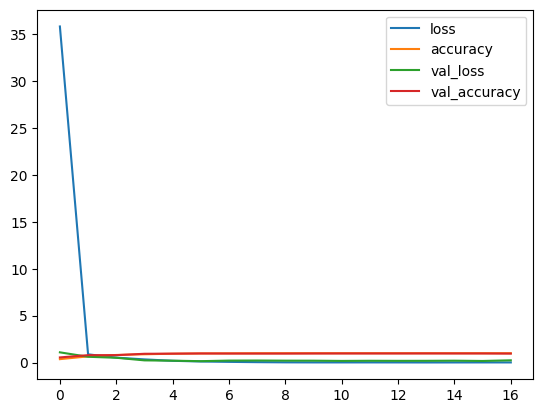

In [11]:
data.plot()

In [13]:
y_pred = model1.predict(val_ds)
y_true = np.concatenate([y for x, y in val_ds], axis=0)


12/12 [==============================] - 1s 42ms/step


In [14]:
report = classification_report(y_true, np.argmax(y_pred, axis=1))
print(report)


              precision    recall  f1-score   support

           0       0.26      0.27      0.26       116
           1       0.15      0.12      0.13        67
           2       0.31      0.31      0.31       114
           3       0.19      0.21      0.20        81

    accuracy                           0.24       378
   macro avg       0.23      0.23      0.23       378
weighted avg       0.24      0.24      0.24       378



In [15]:
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print(cm)


[[31 22 29 34]
 [27  8 21 11]
 [39 12 35 28]
 [22 13 29 17]]


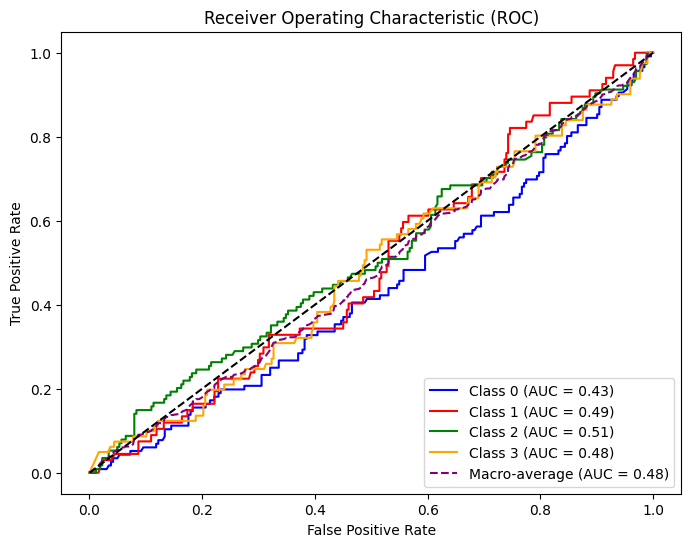

In [23]:
# Calculate the ROC curve and macro-average AUC score
n_classes = y_pred.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']  # Add more colors if needed
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot(fpr_macro, tpr_macro, color='purple', linestyle='--', label='Macro-average (AUC = %0.2f)' % roc_auc_macro)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
